In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
#Complete Dataset of Training and Testing
data1 = pd.read_csv("Polynomial_train.csv")
data2 = pd.read_csv("Polynomial_test.csv")

In [3]:
A = data1.drop(data1.columns[[0]], axis=1) 
B = data2.drop(data1.columns[[0]], axis=1)  

In [4]:
train_data = data1.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)  #Labels of Training dataset

In [5]:
test_data = data2.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)   #Labels of Testing dataset 

In [6]:
n = np.square(A)
A = np.concatenate((A, n), axis=1)

m = np.square(B)
B = np.concatenate((B, m), axis=1)

In [7]:
mean = np.mean(A, axis=0)
std = np.std(A, axis=0)
train_f = (A - mean)/std
train_f                     #Normalized features of training set

mean_test = np.mean(B, axis=0)
std = np.std(B, axis=0)
test_f = (B - mean_test)/std
test_f                     #Normalized features of testing set

array([[ 1.60297505,  0.05720184,  1.03462937, ..., -1.11072208,
         0.07928157, -0.40621349],
       [ 0.47468023,  1.04970951,  1.10975544, ...,  0.14737198,
         0.25988848, -0.45993234],
       [-0.47538427,  1.33246805, -1.1986559 , ...,  0.90829023,
         0.48925718, -0.57594677],
       ...,
       [ 1.13830576,  1.17479815,  0.77993999, ...,  0.46197752,
        -0.43884384,  0.66975758],
       [-1.09803786,  0.21485319, -0.67750819, ..., -1.05779564,
        -0.60661474, -0.57798017],
       [ 1.42406529, -0.07871527,  0.36279375, ..., -1.11181417,
        -0.97331028, -0.57651361]])

In [8]:
 #Adding column of ones before all the Features
train_f = np.vstack((np.ones((train_f.shape[0], )), train_f.T)).T
test_f = np.vstack((np.ones((test_f.shape[0], )), test_f.T)).T

In [9]:
def PolynomialRegression(X, Y, lr, iter):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iter):        
        y_p = np.dot(X, theta)
        
        #Cost Function
        cost = (1/(2*m))*np.sum(np.square(y_p - Y))
        
        #Gradient Descent
        d_theta = (np.dot(X.T, y_p - Y))*(1/m)
        theta = theta - lr*d_theta
        
        cost_list.append(cost)
        if (i%(iter/10) == 0):
            print("Cost is :", cost)
        
    return theta, cost_list

In [10]:
iter = 100
lr = 0.05
theta, cost_list = PolynomialRegression(test_f, Y_test, lr = lr, iter = iter)

Cost is : 727099.5504780577
Cost is : 250761.46134490328
Cost is : 92141.90088437928
Cost is : 36035.511955726775
Cost is : 15129.409641537832
Cost is : 6919.033489901726
Cost is : 3491.5038558401952
Cost is : 1948.5172981779665
Cost is : 1188.2829666779137
Cost is : 775.4181083198425


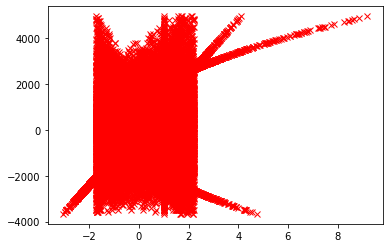

In [11]:
plt.plot(test_f, Y_test, 'rx')

In [12]:
y_p = np.dot(test_f, theta)
error = (1/test_f.shape[0])*(np.sum(np.abs(y_p - Y_test)))
error

24.91085909572674

In [13]:
m = Y_test.size
rmse = np.sqrt(np.sum(np.square(y_p - Y_test))/m)
rmse

32.55314460699144

In [14]:
r2_score(Y_test, y_p)

0.9992710293738281